# Exploratory Data Analysis of the Iris Dataset

## Importing the Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset into a DataFrame

In [6]:
iris_df = pd.read_csv("Iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Define variables

- Target variable: `Species`
- Feature variables: `SepalLengthCm`, `SepalWidthCm`, `PetalLengthCm`, `PetalWidthCm`
- Useless variables: `Id`

Let's drop the useless variable `Id`.

In [7]:
useless_variables = ["Id"]
iris_df.drop(columns=useless_variables, axis=1, inplace=True)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Missing values

In [8]:
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Since there's no missing values, we can proceed to the next step.

## Correlation

<Axes: >

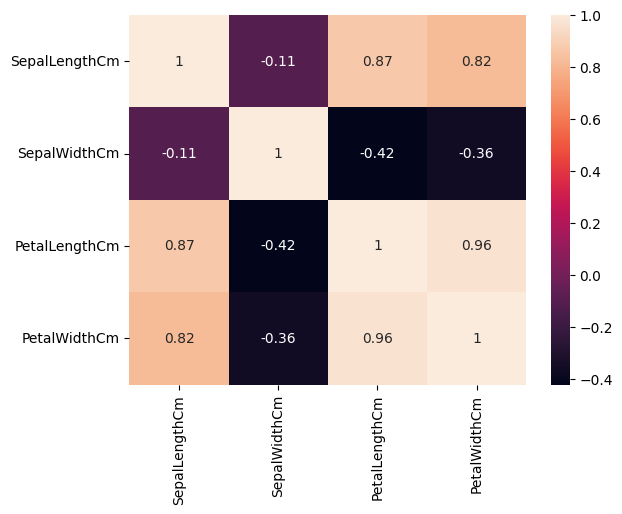

In [13]:
sns.heatmap(iris_df.corr(numeric_only=True), annot=True)

## Histogram

### Histogram of Sepal Length and Sepal Width

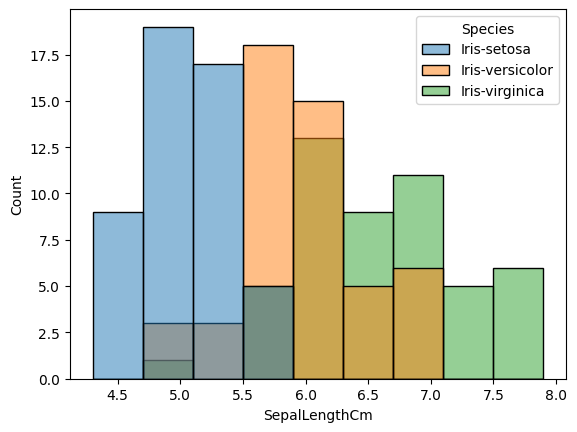

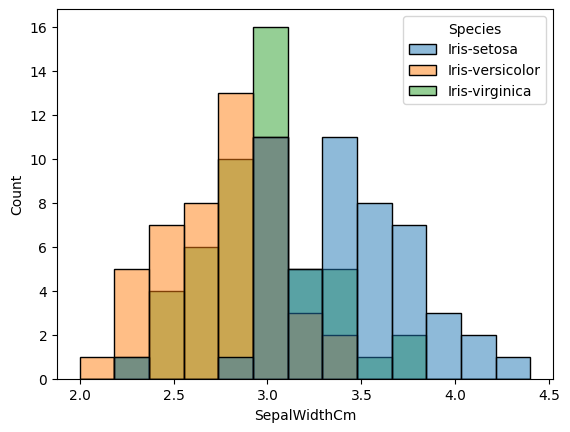

In [24]:
sns.histplot(data=iris_df, x="SepalLengthCm", hue="Species", stat="count")
plt.show()
sns.histplot(data=iris_df, x="SepalWidthCm", hue="Species", stat="count")
plt.show()

### Histogram of Petal Length and Petal Width

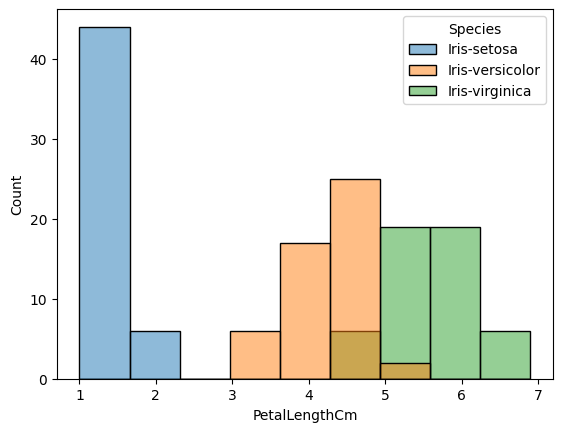

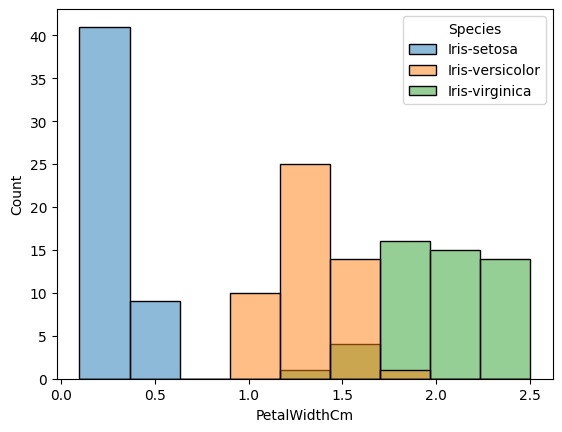

In [25]:
sns.histplot(data=iris_df, x="PetalLengthCm", hue="Species", stat="count")
plt.show()
sns.histplot(data=iris_df, x="PetalWidthCm", hue="Species", stat="count")
plt.show()


## Boxplot

### Boxplot of Sepal Length and Sepal Width

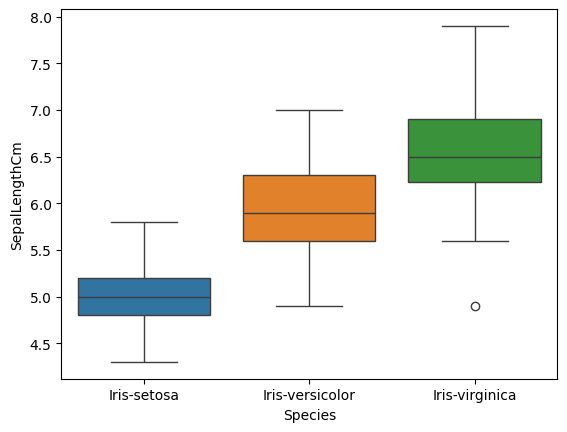

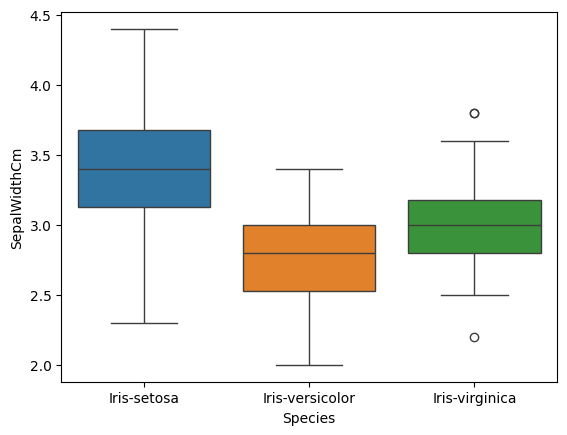

In [32]:
sns.boxplot(data=iris_df, x="Species", y="SepalLengthCm", hue="Species")
plt.show()
sns.boxplot(data=iris_df, x="Species", y="SepalWidthCm", hue="Species")
plt.show()

### Boxplot of Petal Length and Petal Width

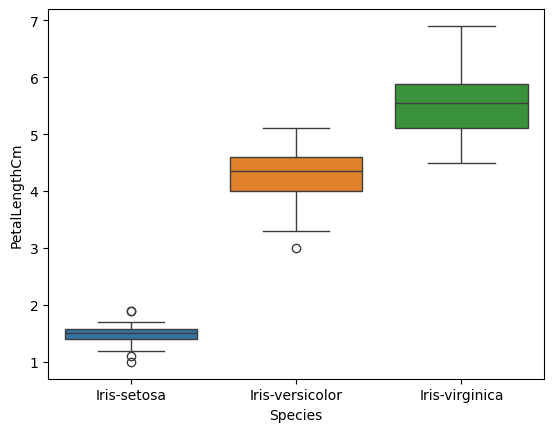

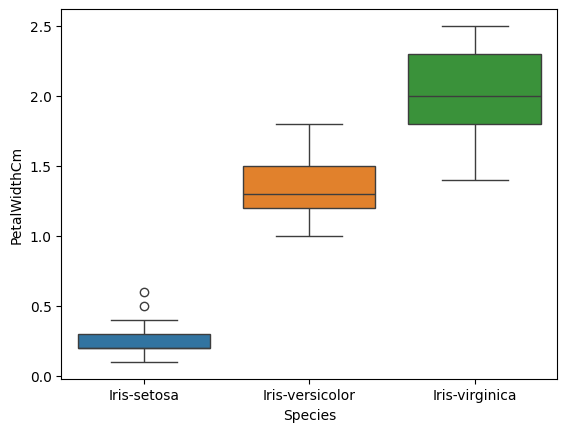

In [33]:
sns.boxplot(data=iris_df, x="Species", y="PetalLengthCm", hue="Species")
plt.show()
sns.boxplot(data=iris_df, x="Species", y="PetalWidthCm", hue="Species")
plt.show()

## Violin plot

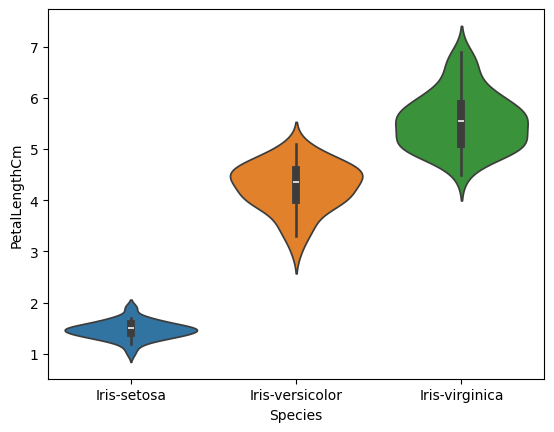

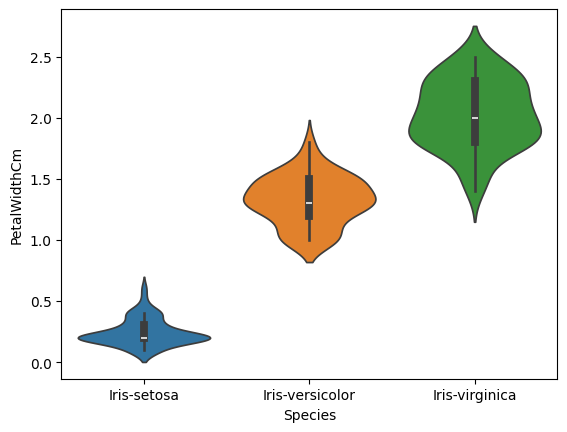

In [35]:
sns.violinplot(data=iris_df, x="Species", y="PetalLengthCm", hue="Species")
plt.show()
sns.violinplot(data=iris_df, x="Species", y="PetalWidthCm", hue="Species")
plt.show()

We can see that the Petal Length and Petal Width are the most important features for distinguishing between the three species of Iris.

## Let's dive into the Petal Length and Petal Width deeper

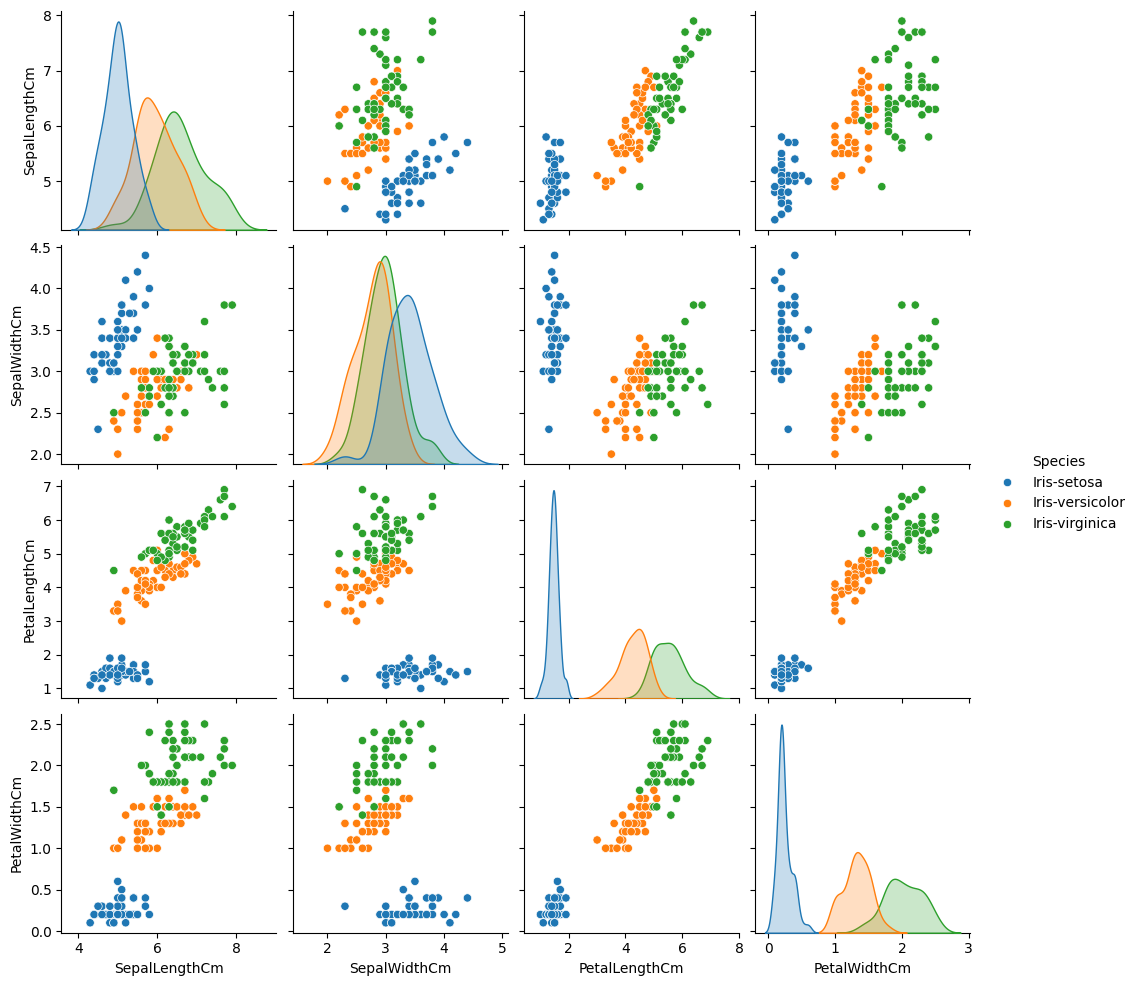

In [36]:
sns.pairplot(data=iris_df, hue="Species")
plt.show()

Setosa species has the smallest petal length and width, while virginica species has the largest petal length and width.

While setosa species could be easily separated from the other two species by Petal Length and Petal Width, versicolor and virginica species are more difficult to separate. But as we can see, the density of them is lowest when comparing Petal Length and Petal Width.

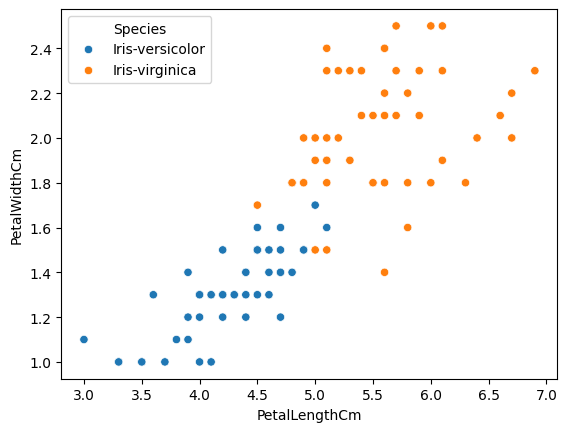

In [47]:
without_setosa = iris_df.drop(iris_df[(iris_df['Species'] == 'Iris-setosa')].index, inplace=False)
sns.scatterplot(data=without_setosa, x="PetalLengthCm", y="PetalWidthCm", hue="Species")
plt.show()

In [70]:
grouped = iris_df.groupby('Species').agg(["mean", "median", "var", "min", "max"])
grouped.T

Species               Iris-setosa  Iris-versicolor  Iris-virginica
SepalLengthCm mean       5.006000         5.936000        6.588000
              median     5.000000         5.900000        6.500000
              var        0.124249         0.266433        0.404343
              min        4.300000         4.900000        4.900000
              max        5.800000         7.000000        7.900000
SepalWidthCm  mean       3.418000         2.770000        2.974000
              median     3.400000         2.800000        3.000000
              var        0.145180         0.098469        0.104004
              min        2.300000         2.000000        2.200000
              max        4.400000         3.400000        3.800000
PetalLengthCm mean       1.464000         4.260000        5.552000
              median     1.500000         4.350000        5.550000
              var        0.030106         0.220816        0.304588
              min        1.000000         3.000000        4.500000
              max        1.900000         5.100000        6.900000
PetalWidthCm  mean       0.244000         1.326000        2.026000
              median     0.200000         1.300000        2.000000
              var        0.011494         0.039106        0.075433
              min        0.100000         1.000000        1.400000
              max        0.600000         1.800000        2.500000

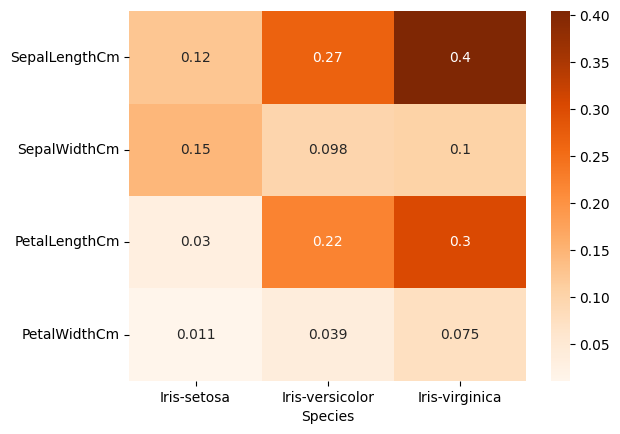

In [68]:
var_data = iris_df.groupby("Species").var(numeric_only=True).T
sns.heatmap(var_data, annot=True, cmap="Oranges")
plt.show()

We can see that the Petal Length and Petal Width have lower variance than the Sepal Length and Sepal Width. This means that the Petal Length and Petal Width are less spread out than the Sepal Length and Sepal Width.

## Conclusion

Petal Width has the least variance, so it is the best feature to separate the three species of Iris.
Setosa has the smallest petal length and width, while virginica has the largest petal length and width.
Still, versicolor species is the most difficult to separate from the other two species because of the overlap in petal length and width with virginica.
